Kalman Filter (KF) Lab
-----

We are going to refactor some "classic" Python. Let's bring into the modern era.

By The End Of This Session You Should Be Able To:
----

- Implement Kalman Filter to filter 1 dimensional data
- Practice reading and refactoring other people's code
- Practice OOP principles

-----
Andrew D. Straw did a fine implementation of KF as seen [here](http://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html) and below.

It was based on an example given in pages 11-15 of "An Introduction to the Kalman Filter" by Greg Welch and Gary Bishop.   
http://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

In [26]:
reset -fs

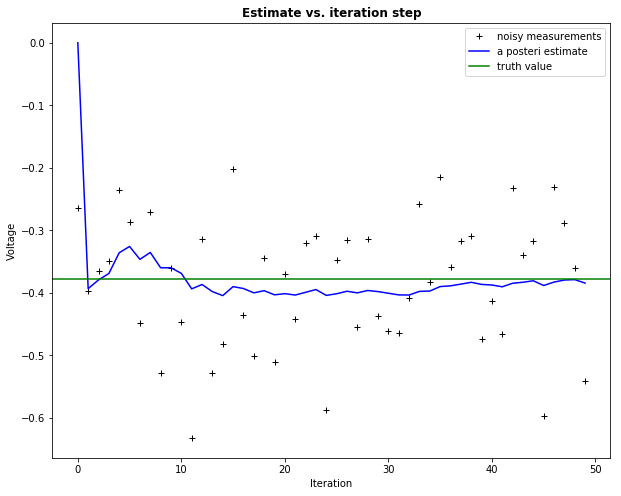

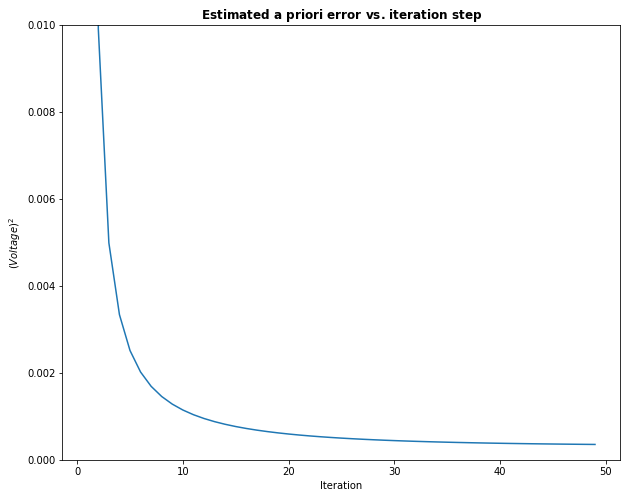

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

-----

![](http://blog.kdheepak.com/images/raymondhettinger.jpg)


__TODO__: Rename the variables

Make them more descriptive (and yes, longer) based on the comments.

<br>
<details><summary>
Click here for a hint…
</summary>
Look at my starter class code for ideas
</details>

In [28]:
# allocate space for arrays
new_estimate_of_state = np.zeros(sz)      # a posteri estimate of x
new_estimate_of_error = np.zeros(sz)         # a posteri error estimate
first_estiamte_of_state = np.zeros(sz) # a priori estimate of x
first_estimate_of_error = np.zeros(sz)    # a priori error estimate
information_gain =np.zeros(sz)         # gain or blending factor
measurement_variance = 0.1**2 # estimate of measurement variance, change to see effect
process_variance = 1e-5 # process variance

__TODO__: KF only needs POPO (Plain Old Python Objects). Get rid of all the numpy arrays and __only__ track only the previous value.

In [29]:
# allocate space for arrays
posteri_estimate = []      # a posteri estimate of x
posteri_error_estimate = []        # a posteri error estimate
priori_estimate = [] # a priori estimate of x
priori_error_estimate= []    # a priori error estimate
blending_factor  = []         # gain or blending factor
measurement_variance = 0.1**2 # estimate of measurement variance, change to see effect
process_variance = 1e-5 # process variance

__TODO__: That was Data Analyst style code. We can be ML Engineers!!! Let's make a reusable class:

In [30]:
for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

In [31]:
# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor
Q = 1e-5 # process variance
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

In [32]:
class KalmanFilter:
    "https://en.wikipedia.org/wiki/Kalman_filter"
    
    def __init__(self, process_variance, estimated_measurement_variance):
        self.process_variance = process_variance
        self.estimated_measurement_variance = estimated_measurement_variance
        self.posteri_estimate = 0.0
        self.posteri_error_estimate = 1.0

    def input_latest_noisy_measurement(self, measurement):
        priori_estimate = self.posteri_estimate
        priori_error_estimate = self.posteri_error_estimate + self.process_variance
        blending_factor = priori_error_estimate / (priori_error_estimate + self.estimated_measurement_variance)
        self.posteri_estimate = priori_estimate+ blending_factor*(measurement - priori_estimate)
        self.posteri_error_estimate = (1-blending_factor)*priori_error_estimate

    def get_latest_estimated_measurement(self):
        return self.posteri_estimate

----
Test our KF on simulated data with noise
----

<br>
<details><summary>
What is the law of 9s?
</summary>
99% of models work on toy data <br>

90% of models work on simulated data <br>

9% of models work on simulated data with noise <br>

.9% of models work on real data <br>
</details>

In [38]:
import random
import numpy

In [57]:
iteration_count = 500

actual_values = [-0.37727 + _ * _ * 0.00001 for _ in range(iteration_count)] # More interesting fake data; Always & Up to the right
noisy_measurement = [random.random() * 2.0 - 1.0 + actual_val for actual_val in actual_values] # Way more noise; Turn it up to 11!
measurement_standard_deviation = numpy.std([random.random() * 2.0 - 1.0 for j in range(iteration_count)])

process_variance = 1e-3 # The smaller this number, the fewer fluctuations, but can also venture off course...
estimated_measurement_variance = measurement_standard_deviation ** 2

In [58]:
kalman_filter = KalmanFilter(process_variance, estimated_measurement_variance)
posteri_estimate_graph = []

for iteration in range(1, iteration_count):
    kalman_filter.input_latest_noisy_measurement(noisy_measurement[iteration])
    posteri_estimate_graph.append(kalman_filter.get_latest_estimated_measurement())

In [59]:
import matplotlib.pyplot as plt

%matplotlib inline

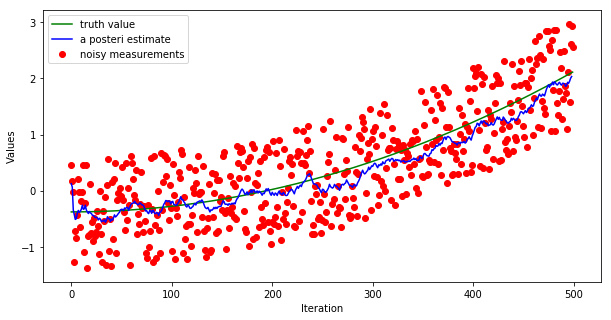

In [60]:
# Plot it up
plt.figure(figsize=(10,5))
plt.plot(actual_values, color='g', label='truth value')
plt.scatter(range(len(noisy_measurement)),noisy_measurement, color='r', label='noisy measurements')
plt.plot(posteri_estimate_graph, color='b', label='a posteri estimate')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Values')
plt.show()

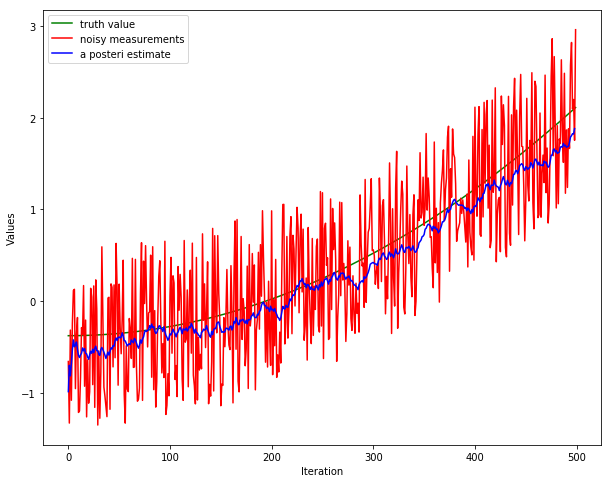

In [36]:
# Plot it up
plt.plot(actual_values, color='g', label='truth value')
plt.plot(noisy_measurement, color='r', label='noisy measurements')
plt.plot(posteri_estimate_graph, color='b', label='a posteri estimate')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Values')
plt.show()

__TOD0__: Did your Kalman filter do well in filtering out the noise?

Refactoring is fun (but dangerous work)

![](http://ljdchost.com/XgodwMJ.gif)

__TODO__: Reflect and summarize how the refactoring went. What was easy? What as a challenge? What did you spend the most time on?

In [34]:
# Renaming the variables was easy
# The hardest part was following the code used above (and the variables they defined)
# I spent the most time on following her/his logic

-----
Challenge Activities
----

IPython and Sympy to Develop a Kalman Filter for Multisensor Data Fusion
--------

Work through this [notebook](https://github.com/balzer82/PyData-Berlin-2014-Kalman)

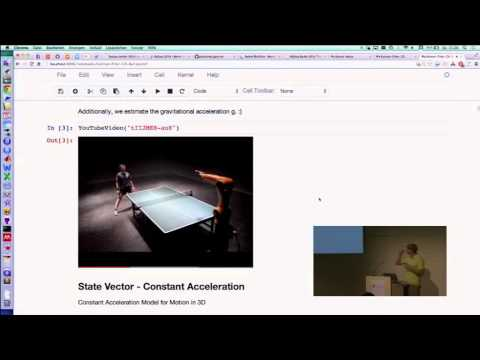

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo("XSRr2HHedrY")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import YouTubeVideo
from scipy.stats import norm

In [2]:
%matplotlib inline
fw=10 # figure width

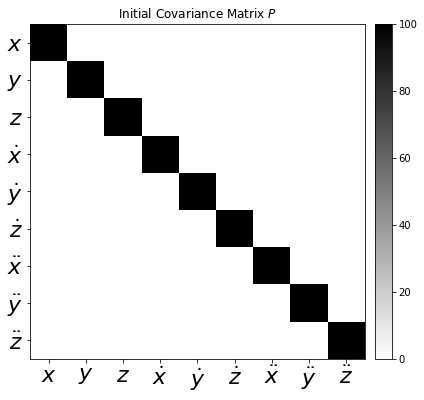

In [3]:
P = 100.0*np.eye(9)

fig = plt.figure(figsize=(6, 6))
im = plt.imshow(P, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Initial Covariance Matrix $P$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(10))
# set the locations and labels of the yticks
plt.yticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

plt.xlim([-0.5,8.5])
plt.ylim([8.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)


plt.tight_layout()

In [4]:
P

array([[ 100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,  100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,  100.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,  100.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,  100.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,  100.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,  100.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,  100.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  100.]])

In [5]:
dt = 1.0/100.0 # Time Step between Filter Steps, 100Hz

A = np.matrix([[1.0, 0.0, 0.0, dt, 0.0, 0.0, 1/2.0*dt**2, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0, 1/2.0*dt**2, 0.0],
              [0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0, 1/2.0*dt**2],
              [0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,  dt],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(A.shape)

(9, 9)


In [6]:
# dynamic matrix
A

matrix([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e-02,   0.00000000e+00,   0.00000000e+00,
           5.00000000e-05,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.00000000e-02,   0.00000000e+00,
           0.00000000e+00,   5.00000000e-05,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.00000000e-02,
           0.00000000e+00,   0.00000000e+00,   5.00000000e-05],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e-02,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   1.00000000e-02,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.0

In [7]:
#measurement matrix
H = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
print(H, H.shape)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]] (3, 9)


In [8]:
# noise covariance matrix
rp = 5.0**2  # Noise of Position Measurement
R = np.matrix([[rp, 0.0, 0.0],
               [0.0, rp, 0.0],
               [0.0, 0.0, rp]])
print(R, R.shape)

[[ 25.   0.   0.]
 [  0.  25.   0.]
 [  0.   0.  25.]] (3, 3)


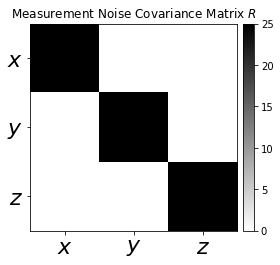

In [9]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(R, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Measurement Noise Covariance Matrix $R$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(4))
# set the locations and labels of the yticks
plt.yticks(np.arange(3),('$x$', '$y$', '$z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(4))
# set the locations and labels of the yticks
plt.xticks(np.arange(3),('$x$', '$y$', '$z$'), fontsize=22)

plt.xlim([-0.5,2.5])
plt.ylim([2.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()

In [10]:
from sympy import Symbol, Matrix
from sympy.interactive import printing
printing.init_printing()
dts = Symbol('\Delta t')
Qs = Matrix([[0.5*dts**2],[0.5*dts**2],[0.5*dts**2],[dts],[dts],[dts],[1.0],[1.0],[1.0]])
Qs*Qs.T

⎡             4               4               4              3              3 
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t  
⎢                                                                             
⎢             4               4               4              3              3 
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t  
⎢                                                                             
⎢             4               4               4              3              3 
⎢0.25⋅\Delta t   0.25⋅\Delta t   0.25⋅\Delta t   0.5⋅\Delta t   0.5⋅\Delta t  
⎢                                                                             
⎢            3               3               3             2              2   
⎢0.5⋅\Delta t    0.5⋅\Delta t    0.5⋅\Delta t      \Delta t       \Delta t    
⎢                                                                             
⎢            3               3               3      

In [11]:
sa = 0.5
G = np.matrix([[1/2.0*dt**2],
               [1/2.0*dt**2],
               [1/2.0*dt**2],
               [dt],
               [dt],
               [dt],
               [1.0],
               [1.0],
               [22.0]])  # because we want to estimate g, 
                         # here we use a huge value to give the 
                         # Kalman Filter the possibility to
                         # 'breath'
Q = G*G.T*sa**2

print(Q.shape)

(9, 9)


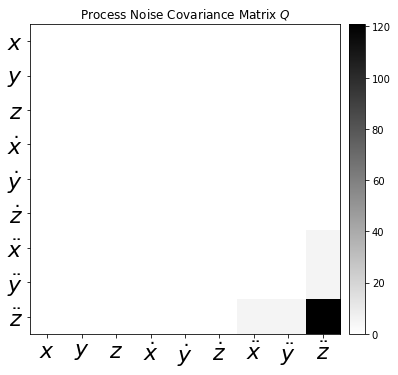

In [12]:
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(Q, interpolation="none", cmap=plt.get_cmap('binary'))
plt.title('Process Noise Covariance Matrix $Q$')
ylocs, ylabels = plt.yticks()
# set the locations of the yticks
plt.yticks(np.arange(10))
# set the locations and labels of the yticks
plt.yticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

xlocs, xlabels = plt.xticks()
# set the locations of the yticks
plt.xticks(np.arange(7))
# set the locations and labels of the yticks
plt.xticks(np.arange(9),('$x$', '$y$', '$z$', '$\dot x$', '$\dot y$', '$\dot z$', '$\ddot x$', '$\ddot y$', '$\ddot z$'), fontsize=22)

plt.xlim([-0.5,8.5])
plt.ylim([8.5, -0.5])

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)



In [13]:
# identity matrix
I = np.eye(9)
print(I, I.shape)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]] (9, 9)


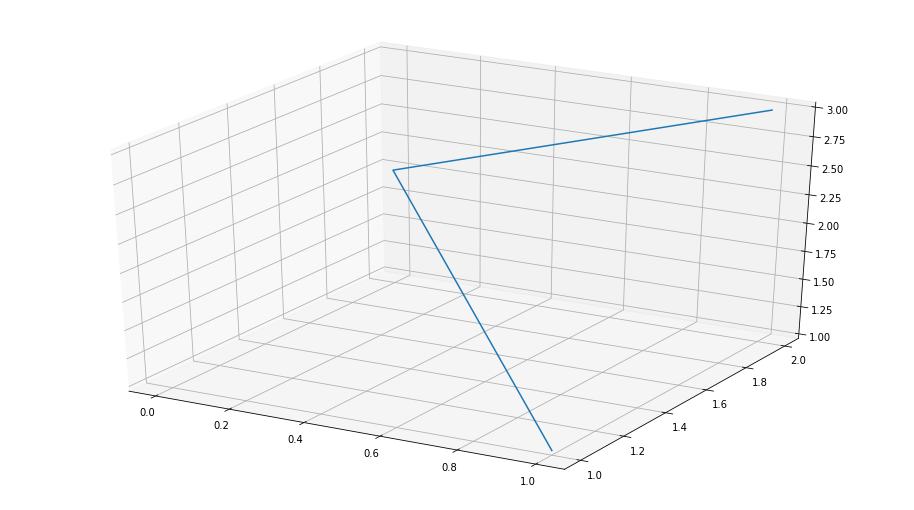

In [17]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot([1,0,1],[2,2,1],[3,2,1])

<br>
<br> 
<br>

----